## Análise de distribuição de inscritos no SISU | Guardians

**🔹 Objetivo principal**

1. Analisar a distribuição de inscritos na primeira e segunda opção no curso de Ciência da Computação na UFCG, sendo os dados analisados dos anos de 2018, 2019, 2020, 2021 e 2022;

**🔹 Objetivos específicos**
1. Analisar a quantidade de homens e mulheres que são aprovados no curso;

2. Estabelecer o total desses inscritos e demonstrar graficamente.


In [ ]:
# importação das bibliotecas para análise em python.

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
# importação dos dados do SISU por meio do github e junção deles em uma única variável.

sisu_2021_1 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2021/sisu_pb_2021.csv'
sisu_2022_1 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2022/sisu_pb_2022.csv'
sisu_2020_1 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2020/sisu_pb_2020_1.csv'
sisu_2020_2 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2020/sisu_pb_2020_2.csv'
sisu_2019_1 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2019/sisu_pb_2019_1.csv'
sisu_2019_2 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2019/sisu_pb_2019_2.csv'
sisu_2018_1 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2018/sisu_pb_2018_1.csv'
sisu_2018_2 = 'https://raw.githubusercontent.com/Guardians-DSC/dados/main/SISU/sisu_2018/sisu_pb_2018_2.csv'

dados = pd.concat(map(pd.read_csv, [sisu_2021_1, sisu_2022_1, sisu_2020_1, sisu_2020_2, sisu_2019_1, sisu_2019_2, sisu_2018_1, sisu_2018_2]))

<ipython-input-2-68af6fc980e5>:12: DtypeWarning: Columns (22,23,24,25,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.concat(map(pd.read_csv, [sisu_2021_1, sisu_2022_1, sisu_2020_1, sisu_2020_2, sisu_2019_1, sisu_2019_2, sisu_2018_1, sisu_2018_2]))
<ipython-input-2-68af6fc980e5>:12: DtypeWarning: Columns (19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.concat(map(pd.read_csv, [sisu_2021_1, sisu_2022_1, sisu_2020_1, sisu_2020_2, sisu_2019_1, sisu_2019_2, sisu_2018_1, sisu_2018_2]))
<ipython-input-2-68af6fc980e5>:12: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.concat(map(pd.read_csv, [sisu_2021_1, sisu_2022_1, sisu_2020_1, sisu_2020_2, sisu_2019_1, sisu_2019_2, sisu_2018_1, sisu_2018_2]))
<ipython-input-2-68af6fc980e5>:12: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=Fals

## 1° etapa
Análise do total de inscritos na primeira e segunda opção.

In [ ]:
# demonstração dos dados obtidos por meio de uma tabela

dados.head()

,ano,edicao,etapa,ds_etapa,codigo_ies,nome_ies,sigla_ies,uf_ies,codigo_campus,nome_campus,...,nota_r_com_peso,nota_candidato,nota_corte,classificacao,aprovado,matricula,ds_periodicidade,tp_cota,qt_vagas_concorrencia,percentual_bonus
0,2021,1,4,1° CHAMADA,579,UNIVERSIDADE FEDERAL DA PARAÍBA,UFPB,PB,1001624,Unidade sede,...,580.0,569.76,573.22,34.0,N,PENDENTE,NaN,NaN,NaN,NaN
1,2021,1,4,1° CHAMADA,579,UNIVERSIDADE FEDERAL DA PARAÍBA,UFPB,PB,1001624,Unidade sede,...,580.0,469.90,573.22,84.0,N,PENDENTE,NaN,NaN,NaN,NaN
2,2021,1,4,1° CHAMADA,579,UNIVERSIDADE FEDERAL DA PARAÍBA,UFPB,PB,1001624,Unidade sede,...,740.0,612.76,573.22,8.0,S,NÃO COMPARECEU,NaN,NaN,NaN,NaN
3,2021,1,4,1° CHAMADA,579,UNIVERSIDADE FEDERAL DA PARAÍBA,UFPB,PB,1001624,Unidade sede,...,680.0,552.94,558.86,7.0,N,PENDENTE,NaN,NaN,NaN,NaN
4,2021,1,4,1° CHAMADA,579,UNIVERSIDADE FEDERAL DA PARAÍBA,UFPB,PB,1001624,Unidade sede,...,720.0,559.34,555.94,6.0,S,EFETIVADA,NaN,NaN,NaN,NaN


In [ ]:
# todas as colunas existentes no dataframe.

print(dados.columns)

Index(['ano', 'edicao', 'etapa', 'ds_etapa', 'codigo_ies', 'nome_ies',
       'sigla_ies', 'uf_ies', 'codigo_campus', 'nome_campus', 'uf_campus',
       'municipio_campus', 'codigo_curso', 'nome_curso', 'grau', 'turno',
       'tipo_mod_concorrencia', 'mod_concorrencia', 'peso_l', 'peso_ch',
       'peso_cn', 'peso_m', 'peso_r', 'nota_minima_l', 'nota_minima_ch',
       'nota_minima_cn', 'nota_minima_m', 'nota_minima_r', 'media_minima',
       'sexo', 'data_nascimento', 'uf_candidato', 'municipio_candidato',
       'opcao', 'nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r',
       'nota_l_com_peso', 'nota_ch_com_peso', 'nota_cn_com_peso',
       'nota_m_com_peso', 'nota_r_com_peso', 'nota_candidato', 'nota_corte',
       'classificacao', 'aprovado', 'matricula', 'ds_periodicidade', 'tp_cota',
       'qt_vagas_concorrencia', 'percentual_bonus'],
      dtype='object')


In [ ]:
# simplificação de tabelas, nesta etapa apenas 8 colunas serão consideradas para atingir os objetivos. Além disso, os dados, posteriormente
# são filtrados para o curso de Ciência da Computação na UFCG.

colunas_informacoes = ['ano', 'ds_etapa', 'nome_ies', 'sigla_ies', 'nome_curso', 'opcao', 'aprovado', 'sexo']
dados_notas = dados[colunas_informacoes].dropna()

dados_notas.columns = ['Ano', 'Etapa', 'Nome da universidase', 'Sigla', 'Curso', 'Opção', 'Aprovado', 'Sexo']
dados_ufcg = dados_notas.loc[dados_notas['Sigla'] == 'UFCG']
dados_curso = dados_ufcg.loc[dados_ufcg['Curso'] == 'CIÊNCIA DA COMPUTAÇÃO']
dados_curso.head()

,Ano,Etapa,Nome da universidase,Sigla,Curso,Opção,Aprovado,Sexo
25091,2021,1° CHAMADA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,UFCG,CIÊNCIA DA COMPUTAÇÃO,1,N,M
25105,2021,1° CHAMADA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,UFCG,CIÊNCIA DA COMPUTAÇÃO,1,N,M
25106,2021,1° CHAMADA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,UFCG,CIÊNCIA DA COMPUTAÇÃO,1,N,M
25107,2021,1° CHAMADA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,UFCG,CIÊNCIA DA COMPUTAÇÃO,1,N,M
25135,2021,1° CHAMADA,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,UFCG,CIÊNCIA DA COMPUTAÇÃO,1,N,M


## 1° Resultado atingido:

🔹 Depois da filtração de dados, foi possível obter o total de inscritos no curso de forma geral (incluindo primeira e segunda opção) e também dados mais específicos, como apenas o total de inscritos na primeira opção e o total de inscritos na segunda opção.

🔹 Dessa forma, uma parte do primeiro objetivo foi atingido.

### dados obtidos:


> **total inscritos:** 6365

> **total como  primeira opção:**  3802

> **total como  segunda opção:**  2563





In [ ]:
# análise de dados para obter o total de inscritos no curso.

print('total inscritos: ', len(dados_curso))
print('total como  primeira opção: ', len(dados_curso.loc[dados_curso['Opção'] == 1]))
print('total como  segunda opção: ', len(dados_curso.loc[dados_curso['Opção'] == 2]))

total inscritos:  6365
total como  primeira opção:  3802
total como  segunda opção:  2563



## 2° Resultado atingido:

🔹 Com os resultados da 1° etapa, foi possível descrever graficamente esses resultado, sendo esses descritos logo abaixo.




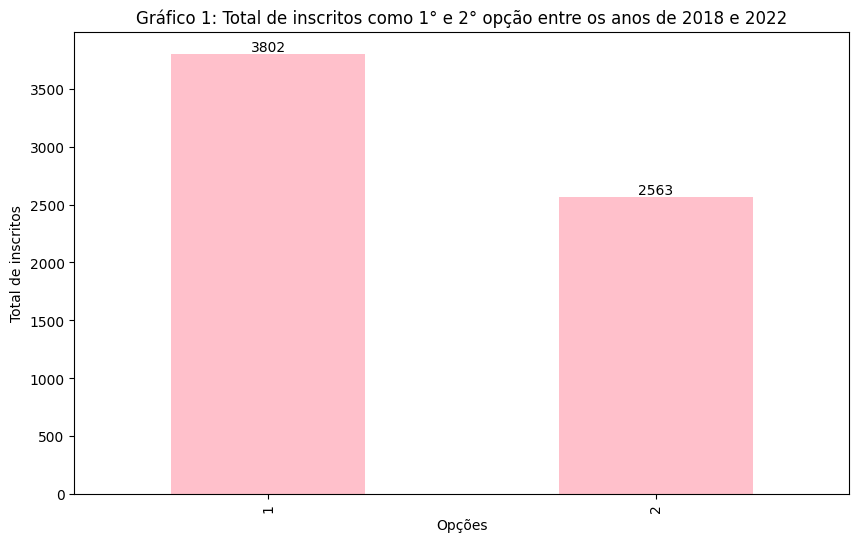

In [ ]:
# criação do gráfico dos resultados da 1° etapa.

ax = dados_curso['Opção'].value_counts().plot.bar(color='pink',
                                                  title='Gráfico 1: Total de inscritos como 1° e 2° opção entre os anos de 2018 e 2022',
                                                  figsize=(10, 6))

ax.set_xlabel('Opções')
ax.set_ylabel('Total de inscritos')
for container in ax.containers:
  ax.bar_label(container, fmt='%.0f')


In [ ]:
# criação de variáveis para separar os dados da primeira e segunda opção a depender do ano do SISU.

dados_2018 = dados_curso.loc[dados_curso['Ano'] == 2018]
dados_2018_1 = dados_2018.loc[dados_2018['Opção'] == 1]
dados_2018_2 = dados_2018.loc[dados_2018['Opção'] == 2]

dados_2019 = dados_curso.loc[dados_curso['Ano'] == 2019]
dados_2019_1 =dados_2019.loc[dados_2019['Opção'] == 1]
dados_2019_2 = dados_2019.loc[dados_2019['Opção'] == 2]

dados_2020 = dados_curso.loc[dados_curso['Ano'] == 2020]
dados_2020_1 =dados_2020.loc[dados_2020['Opção'] == 1]
dados_2020_2 = dados_2020.loc[dados_2020['Opção'] == 2]

dados_2021 = dados_curso.loc[dados_curso['Ano'] == 2021]
dados_2021_1 =dados_2021.loc[dados_2021['Opção'] == 1]
dados_2021_2 = dados_2021.loc[dados_2021['Opção'] == 2]

dados_2022 = dados_curso.loc[dados_curso['Ano'] == 2022]
dados_2022_1 =dados_2022.loc[dados_2022['Opção'] == 1]
dados_2022_2 = dados_2022.loc[dados_2022['Opção'] == 2]

## 3° Resultado atingido:

🔹 Com os resultados da 1° etapa, foi possível separar esses dados a depender do ano de inscrição. Separando a primeira opção e a segunda opção de acordo com o ano. Com isso, foi criado o gráfico para que seja descrito visualmente esses dados.



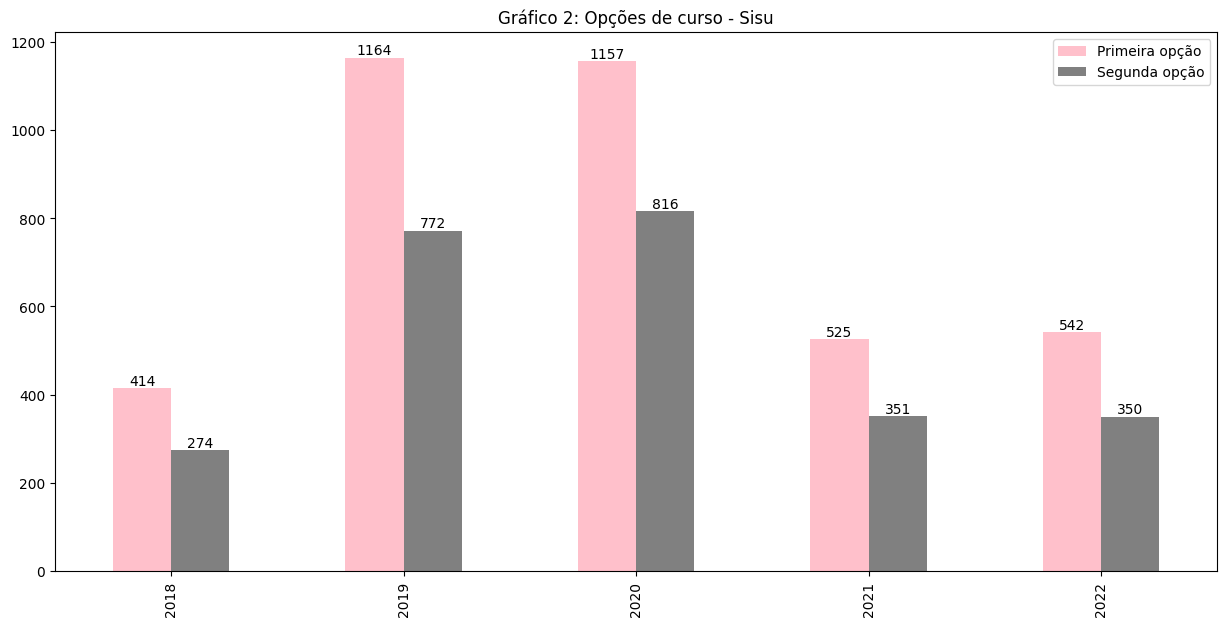

In [ ]:
# Criação do gráfico e suas especifidades de acordo com o ano e opção de inscrição.

df = pd.DataFrame({'Primeira opção': [len(dados_2018_1), len(dados_2019_1), len(dados_2020_1), len(dados_2021_1), len(dados_2022_1)],
                   'Segunda opção': [len(dados_2018_2), len(dados_2019_2), len(dados_2020_2), len(dados_2021_2), len(dados_2022_2)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 2: Opções de curso - Sisu",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

In [ ]:
# criação de variáveis para separar os dados da primeira opção de escolha, entre aprovados e reprovados.

dados_2018_s = dados_2018_1.loc[dados_2018_1['Aprovado'] == 'S']
dados_2018_n = dados_2018_1.loc[dados_2018_1['Aprovado'] == 'N']

dados_2019_s = dados_2019_1.loc[dados_2019_1['Aprovado'] == 'S']
dados_2019_n = dados_2019_1.loc[dados_2019_1['Aprovado'] == 'N']

dados_2020_s = dados_2020_1.loc[dados_2020_1['Aprovado'] == 'S']
dados_2020_n = dados_2020_1.loc[dados_2020_1['Aprovado'] == 'N']

dados_2021_s = dados_2021_1.loc[dados_2021_1['Aprovado'] == 'S']
dados_2021_n = dados_2021_1.loc[dados_2021_1['Aprovado'] == 'N']

dados_2022_s = dados_2022_1.loc[dados_2022_1['Aprovado'] == 'S']
dados_2022_n = dados_2022_1.loc[dados_2022_1['Aprovado'] == 'N']

## 4° Resultado atingido:

🔹 Foi possível relacionar e separar os dados entre os estudantes que foram aprovados e reprovados, sendo essa classificação para os que selecionaram o curso de Ciência da Computação na primeira opção de inscrição.


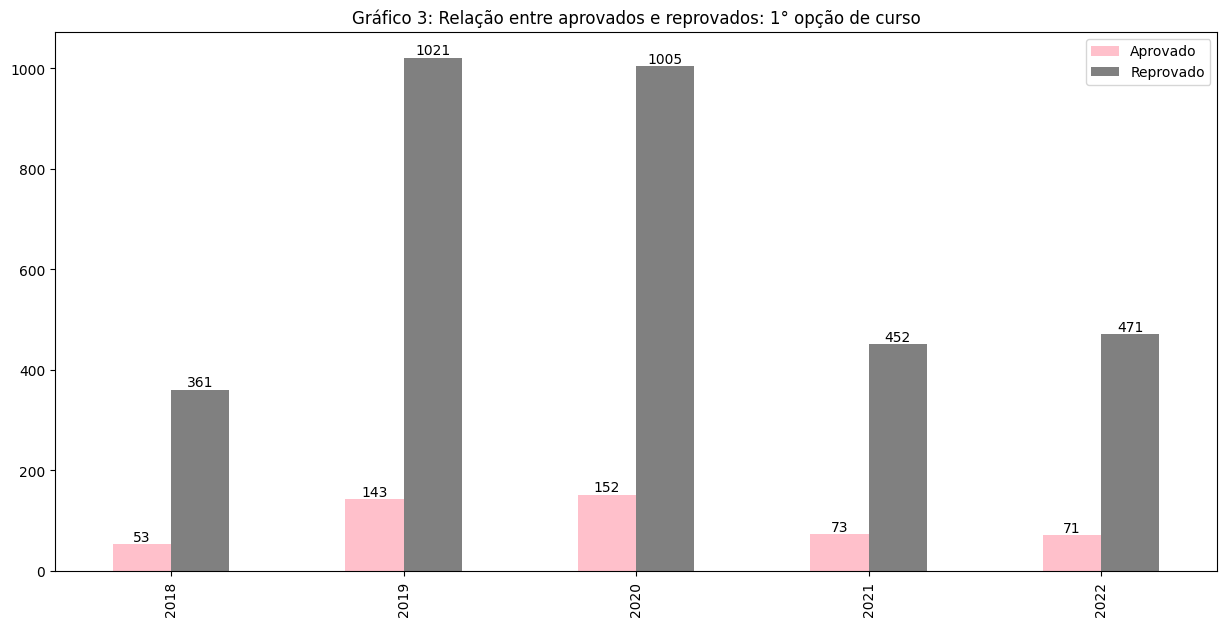

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados entre aprovados e reprovados na primeira opção de acordo com o ano de inscrição.

df = pd.DataFrame({'Aprovado': [len(dados_2018_s), len(dados_2019_s), len(dados_2020_s), len(dados_2021_s), len(dados_2022_s)],
                   'Reprovado': [len(dados_2018_n), len(dados_2019_n), len(dados_2020_n), len(dados_2021_n), len(dados_2022_n)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 3: Relação entre aprovados e reprovados: 1° opção de curso",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

In [ ]:
# criação de variáveis para separar os dados da segunda opção de escolha, entre aprovados e reprovados.

dados_2018_2_s = dados_2018_2.loc[dados_2018_2['Aprovado'] == 'S']
dados_2018_2_n = dados_2018_2.loc[dados_2018_2['Aprovado'] == 'N']

dados_2019_2_s = dados_2019_2.loc[dados_2019_2['Aprovado'] == 'S']
dados_2019_2_n = dados_2019_2.loc[dados_2019_2['Aprovado'] == 'N']

dados_2020_2_s = dados_2020_2.loc[dados_2020_2['Aprovado'] == 'S']
dados_2020_2_n = dados_2020_2.loc[dados_2020_2['Aprovado'] == 'N']

dados_2021_2_s = dados_2021_2.loc[dados_2021_2['Aprovado'] == 'S']
dados_2021_2_n = dados_2021_2.loc[dados_2021_2['Aprovado'] == 'N']

dados_2022_2_s = dados_2022_2.loc[dados_2022_2['Aprovado'] == 'S']
dados_2022_2_n = dados_2022_2.loc[dados_2022_2['Aprovado'] == 'N']

## 5° Resultado atingido:

🔹 Foi possível relacionar e separar os dados entre os estudantes que foram aprovados e reprovados, sendo essa classificação para os que selecionaram o curso de Ciência da Computação na segunda opção de inscrição.

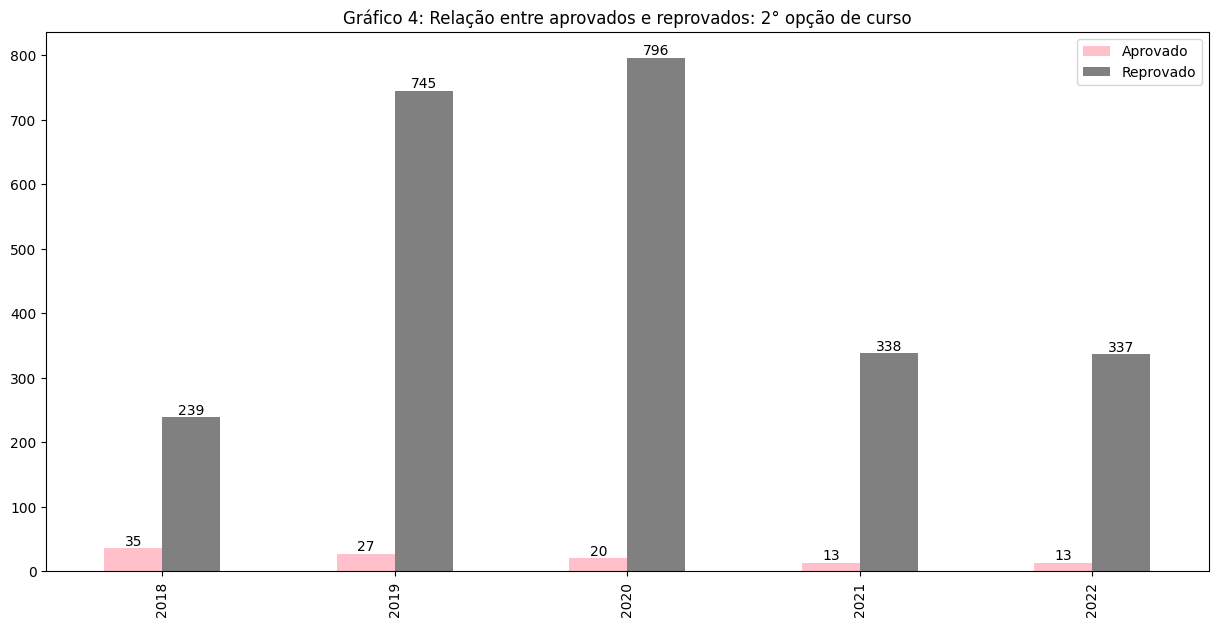

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados entre aprovados e reprovados na segunda opção de acordo com o ano de inscrição.

df = pd.DataFrame({'Aprovado': [len(dados_2018_2_s), len(dados_2019_2_s), len(dados_2020_2_s), len(dados_2021_2_s), len(dados_2022_2_s)],
                   'Reprovado': [len(dados_2018_2_n), len(dados_2019_2_n), len(dados_2020_2_n), len(dados_2021_2_n), len(dados_2022_2_n)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 4: Relação entre aprovados e reprovados: 2° opção de curso",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')


## Objetivo atingido:
Com os dados do gráfico 1, gráfico 2, gráfico 3 e gráfico 4. Foi possível concluir o objetivo específico 2.

## Conclusão:
Com essa finalização, concluímos que para o intervalo de ano de 2018 - 2022, foi possível ter um total de 3802 inscritos, e como segunda opção esse número cai para 2563.
Além disso, sendo que o padrão da maioria dos inscritos serem de primeira opção se repete durante todos os anos analisados. Ademais, podemos verificar também que os aprovados são, em sua maioria, da primeira opção de inscrição.



## 2° etapa
Análise dos resultados da primeira etapa separados por gênero.

## 1° Resultado atingido:

🔹 Foi possível relacionar e separar os dados entre os estudantes aprovados na primeira opção de curso e separar esses dados para identificar o total de homens e mulheres aprovados no curso.

In [ ]:
# criação de variáveis para separar da primeira opção de inscrição a lista de total de aprovados do sexo feminino e masculino.

dados_2018_f = dados_2018_s.loc[dados_2018_s['Sexo'] == 'F']
dados_2018_m = dados_2018_s.loc[dados_2018_s['Sexo'] == 'M']

dados_2019_f = dados_2019_s.loc[dados_2019_s['Sexo'] == 'F']
dados_2019_m = dados_2019_s.loc[dados_2019_s['Sexo'] == 'M']

dados_2020_f = dados_2020_s.loc[dados_2020_s['Sexo'] == 'F']
dados_2020_m = dados_2020_s.loc[dados_2020_s['Sexo'] == 'M']

dados_2021_f = dados_2021_s.loc[dados_2021_s['Sexo'] == 'F']
dados_2021_m = dados_2021_s.loc[dados_2021_s['Sexo'] == 'M']

dados_2022_f = dados_2022_s.loc[dados_2022_s['Sexo'] == 'F']
dados_2022_m = dados_2022_s.loc[dados_2022_s['Sexo'] == 'M']

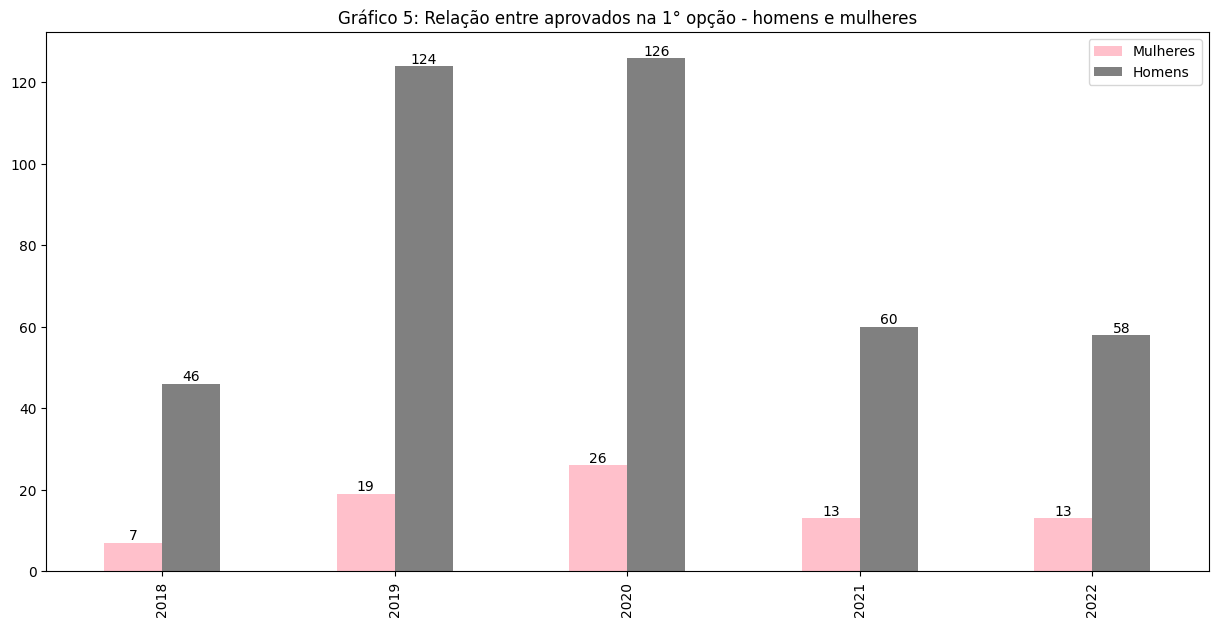

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados dos inscritos aprovados e separar os dados entre o total de mulheres e homens
# que entraram para o curso na primeira opção.

df = pd.DataFrame({'Mulheres': [len(dados_2018_f), len(dados_2019_f), len(dados_2020_f), len(dados_2021_f), len(dados_2022_f)],
                   'Homens': [len(dados_2018_m), len(dados_2019_m), len(dados_2020_m), len(dados_2021_m), len(dados_2022_m)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 5: Relação entre aprovados na 1° opção - homens e mulheres",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

In [ ]:
# criação de variáveis para separar da segunda opção de inscrição a lista de total de aprovados do sexo feminino e masculino.

dados_2018_2_f = dados_2018_2_s.loc[dados_2018_2_s['Sexo'] == 'F']
dados_2018_2_m = dados_2018_2_s.loc[dados_2018_2_s['Sexo'] == 'M']

dados_2019_2_f = dados_2019_2_s.loc[dados_2019_2_s['Sexo'] == 'F']
dados_2019_2_m = dados_2019_2_s.loc[dados_2019_2_s['Sexo'] == 'M']

dados_2020_2_f = dados_2020_2_s.loc[dados_2020_2_s['Sexo'] == 'F']
dados_2020_2_m = dados_2020_2_s.loc[dados_2020_2_s['Sexo'] == 'M']

dados_2021_2_f = dados_2021_2_s.loc[dados_2021_2_s['Sexo'] == 'F']
dados_2021_2_m = dados_2021_2_s.loc[dados_2021_2_s['Sexo'] == 'M']

dados_2022_2_f = dados_2022_2_s.loc[dados_2022_2_s['Sexo'] == 'F']
dados_2022_2_m = dados_2022_2_s.loc[dados_2022_2_s['Sexo'] == 'M']

## 2° Resultado atingido:

🔹 Foi possível relacionar e separar os dados entre os estudantes aprovados na segunda opção de curso e separar esses dados para identificar o total de homens e mulheres aprovados no curso.

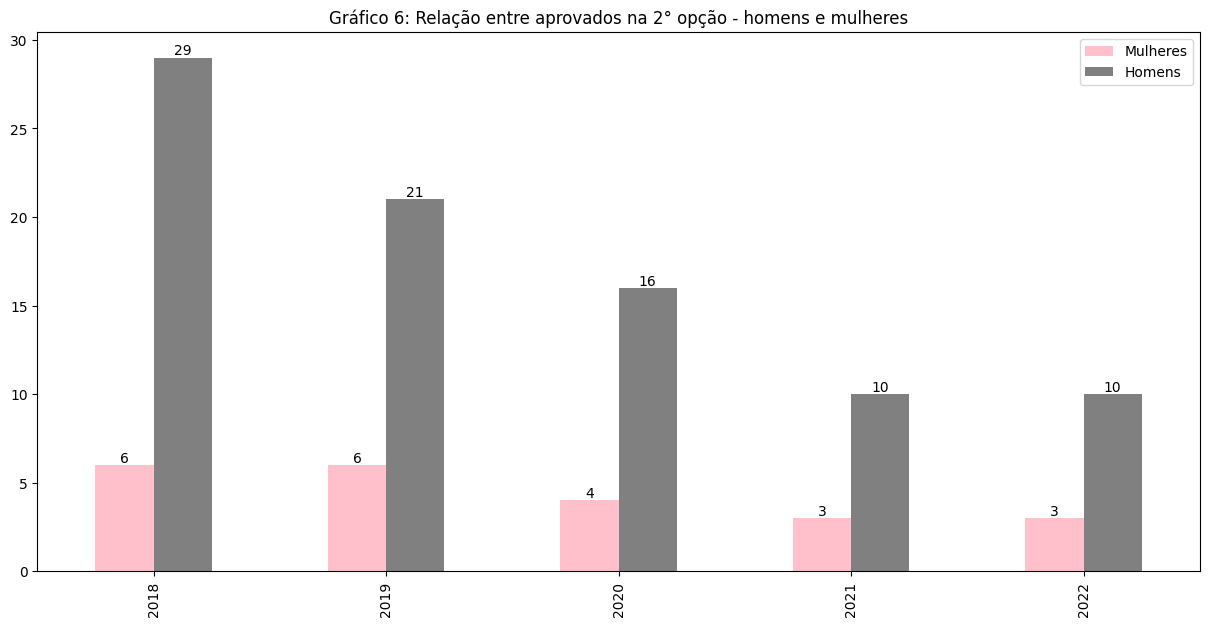

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados dos inscritos aprovados e separar os dados entre o total de mulheres e homens
# que entraram para o curso na segunda opção.

df = pd.DataFrame({'Mulheres': [len(dados_2018_2_f), len(dados_2019_2_f), len(dados_2020_2_f), len(dados_2021_2_f), len(dados_2022_2_f)],
                   'Homens': [len(dados_2018_2_m), len(dados_2019_2_m), len(dados_2020_2_m), len(dados_2021_2_m), len(dados_2022_2_m)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 6: Relação entre aprovados na 2° opção - homens e mulheres",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

In [ ]:
# criação de variáveis para separar os dados de inscritos na primeira opção, entre homens e mulheres.

dados_2018_total_f = dados_2018_1.loc[dados_2018_1['Sexo'] == 'F']
dados_2018_total_m = dados_2018_1.loc[dados_2018_1['Sexo'] == 'M']

dados_2019_total_f = dados_2019_1.loc[dados_2019_1['Sexo'] == 'F']
dados_2019_total_m = dados_2019_1.loc[dados_2019_1['Sexo'] == 'M']

dados_2020_total_f = dados_2020_1.loc[dados_2020_1['Sexo'] == 'F']
dados_2020_total_m = dados_2020_1.loc[dados_2020_1['Sexo'] == 'M']

dados_2021_total_f = dados_2021_1.loc[dados_2021_1['Sexo'] == 'F']
dados_2021_total_m = dados_2021_1.loc[dados_2021_1['Sexo'] == 'M']

dados_2022_total_f = dados_2022_1.loc[dados_2022_1['Sexo'] == 'F']
dados_2022_total_m = dados_2022_1.loc[dados_2022_1['Sexo'] == 'M']

## 3° Resultado atingido:

🔹 Com a criação do gráfico 7 foi possível analisar o total de inscritos da primeira opção de curso e o total de mulheres que se inscreveram e o total de homens.

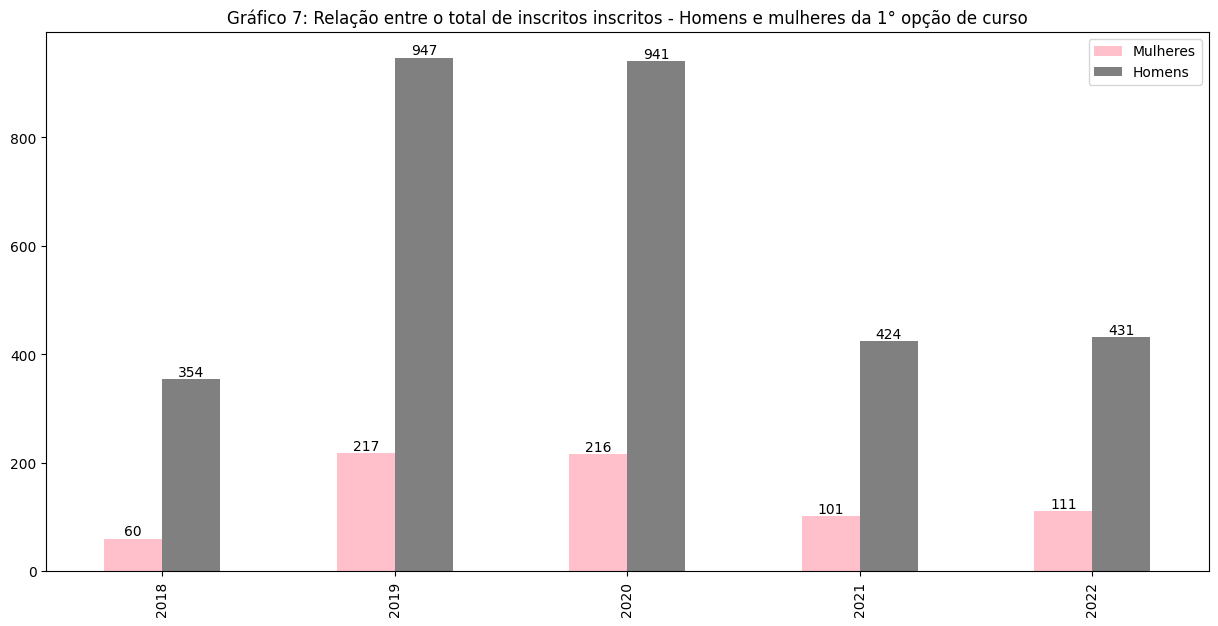

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados do total de inscritos entre homens e mulheres na primeira opção de curso

df = pd.DataFrame({'Mulheres': [len(dados_2018_total_f), len(dados_2019_total_f), len(dados_2020_total_f), len(dados_2021_total_f), len(dados_2022_total_f)],
                   'Homens': [len(dados_2018_total_m), len(dados_2019_total_m), len(dados_2020_total_m), len(dados_2021_total_m), len(dados_2022_total_m)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 7: Relação entre o total de inscritos inscritos - Homens e mulheres da 1° opção de curso",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

In [ ]:
# criação de variáveis para separar os dados de inscritos na segunda opção, entre homens e mulheres.

dados_2018_total__2_f = dados_2018_2.loc[dados_2018_2['Sexo'] == 'F']
dados_2018_total__2_m = dados_2018_2.loc[dados_2018_2['Sexo'] == 'M']

dados_2019_total__2_f = dados_2019_2.loc[dados_2019_2['Sexo'] == 'F']
dados_2019_total__2_m = dados_2019_2.loc[dados_2019_2['Sexo'] == 'M']

dados_2020_total__2_f = dados_2020_2.loc[dados_2020_2['Sexo'] == 'F']
dados_2020_total__2_m = dados_2020_2.loc[dados_2020_2['Sexo'] == 'M']

dados_2021_total__2_f = dados_2021_2.loc[dados_2021_2['Sexo'] == 'F']
dados_2021_total__2_m = dados_2021_2.loc[dados_2021_2['Sexo'] == 'M']

dados_2022_total__2_f = dados_2022_2.loc[dados_2022_2['Sexo'] == 'F']
dados_2022_total__2_m = dados_2022_2.loc[dados_2022_2['Sexo'] == 'M']

## 4° Resultado atingido:

🔹 Com a criação do gráfico 8 foi possível analisar o total de inscritos da segunda opção de curso e o total de mulheres que se inscreveram e o total de homens.

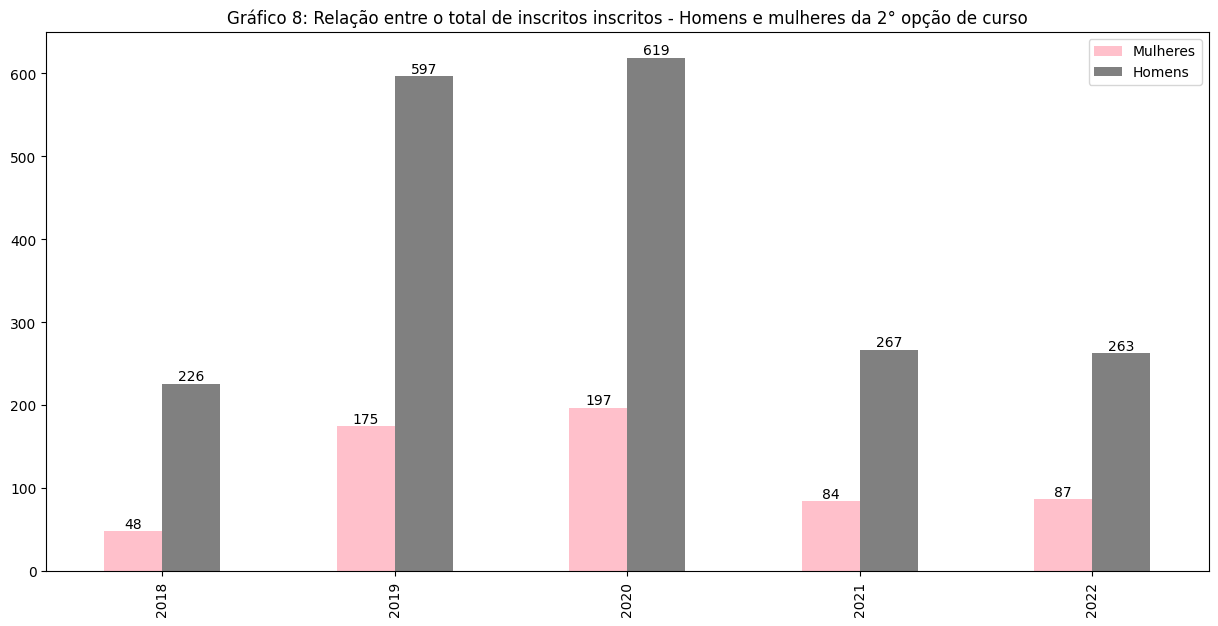

In [ ]:
# Criação do gráfico para que seja possível visualizar os dados do total de inscritos entre homens e mulheres na segunda opção de curso

df = pd.DataFrame({'Mulheres': [len(dados_2018_total__2_f), len(dados_2019_total__2_f), len(dados_2020_total__2_f), len(dados_2021_total__2_f), len(dados_2022_total__2_f)],
                   'Homens': [len(dados_2018_total__2_m), len(dados_2019_total__2_m), len(dados_2020_total__2_m), len(dados_2021_total__2_m), len(dados_2022_total__2_m)]},
                  index=['2018', '2019', '2020', '2021', '2022'])

ax = df.plot.bar(
             title="Gráfico 8: Relação entre o total de inscritos inscritos - Homens e mulheres da 2° opção de curso",
             color={"gray", "pink"},
             figsize = (15,7),
             )

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

## Objetivo atingido:
Com os dados do gráfico 5 e gráfico 6. Foi possível concluir o objetivo específico 1. Além disso, também o objetivo geral juntando a conclusão da etapa 1.

## Conclusão:
Com essa finalização, concluímos que durante o intervalo de anos de 2018 - 2022 o total de mulheres aprovadas foi bem menor que o total de homens aprovados na mesma opção de curso. Abrindo possibilidades para analisar as motivações disso, um baixo número de inscrição, uma dificuldade de entrar na área de exatas ou outras possibilidades que foram possíveis serem analisadas.
Por fim, com o estabelecimento do baixo número de aprovadas, também temos que ocorreu um baixo número de mulheres inscritas para o curso, independente de ser a 1° ou 2° opção de curso.